In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [9]:
# Step 2: Load the data
data = pd.read_excel('Bretford bank.xlsx')

In [11]:
# Step 3: Quick look at data
print(data.head())
print(data.info())
print(data['Attrition Flag'].value_counts())

   Customer ID     Attrition Flag  Age Gender  Number of Dependents  \
0    768805383  Existing Customer   45      M                     3   
1    818770008  Existing Customer   49      F                     5   
2    713982108  Existing Customer   51      M                     3   
3    769911858  Existing Customer   40      F                     4   
4    709106358  Existing Customer   40      M                     3   

  Education Level Marital Status Income Category Card Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months on book  ...  Months Inactive  Contacts count  Credit Limit  \
0              39  ...                1               3       12691.0   
1              44  ...        

In [13]:
# Step 4: Rename columns for convenience
data.columns = [col.strip().replace(' ', '_').replace('-', '_').replace('__','_') for col in data.columns]

In [15]:
# Step 5: Convert target variable to binary
data['Churn'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [17]:
# Step 6: Check for missing values
print(data.isnull().sum())

Customer_ID                  0
Attrition_Flag               0
Age                          0
Gender                       0
Number_of_Dependents         0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category                0
Months_on_book               0
Number_of_Products           0
Months_Inactive              0
Contacts_count               0
Credit_Limit                 0
Total_Revolving_Balance      0
Average_Open_to_Buy          0
Total_Amount_Change_Q4_Q1    0
Total_Transaction_Amount     0
Total_Transaction_Count      0
Total_Count_Change_Q4_Q1     0
Average_Utilization_Ratio    0
Churn                        0
dtype: int64


In [21]:
# Step 7: Encode categorical variables
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in cat_cols:
    data[col] = data[col].astype(str)  # Make sure all are strings
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [24]:
# Step 8: Select features and target for modeling
features = ['Age', 'Gender', 'Number_of_Dependents', 'Education_Level', 'Marital_Status',
            'Income_Category', 'Card_Category', 'Months_on_book', 'Number_of_Products',
            'Months_Inactive', 'Contacts_count', 'Credit_Limit', 'Total_Revolving_Balance',
            'Average_Open_to_Buy', 'Total_Amount_Change_Q4_Q1', 'Total_Transaction_Amount',
            'Total_Transaction_Count', 'Total_Count_Change_Q4_Q1', 'Average_Utilization_Ratio']

X = data[features]
y = data['Churn']

In [26]:
# Step 9: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
# Step 10: Model training - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Step 11: Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9600197433366239

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.94      0.81      0.87       325

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



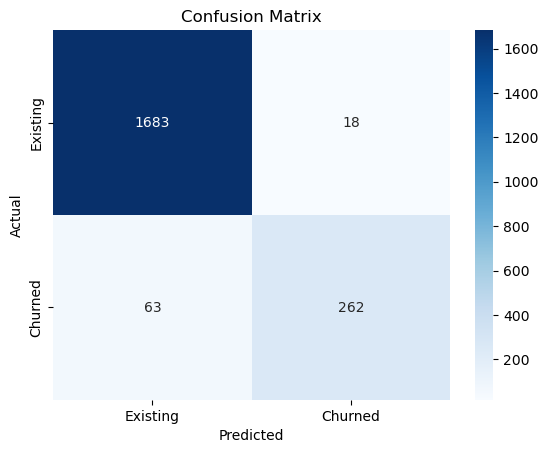

In [32]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Churned'], yticklabels=['Existing', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

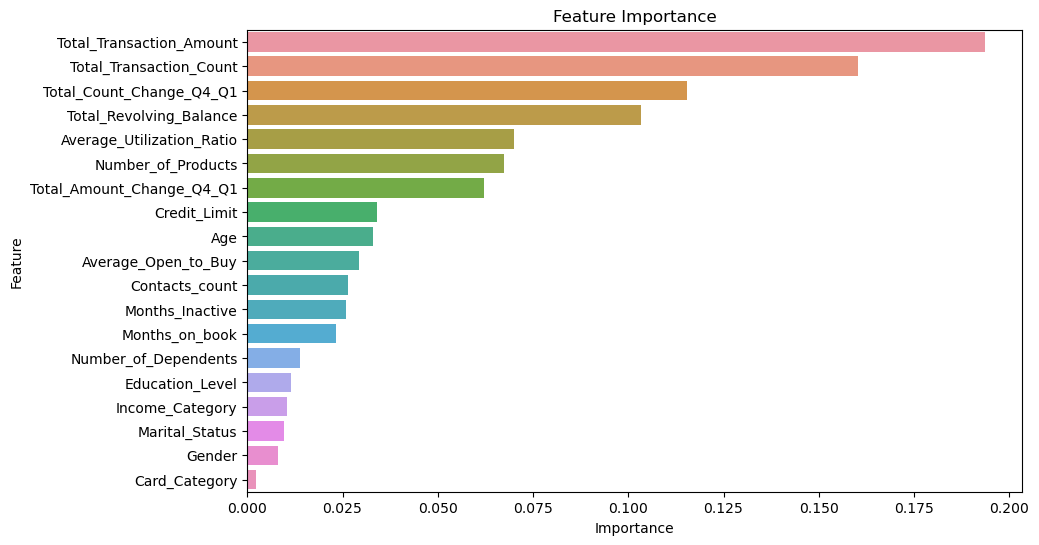

In [34]:
# Step 12: Feature Importance plot
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [36]:
#trying other predictive models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [41]:
# Training and evaluating each model
import numpy as np

# Convert data to numpy arrays with the right memory layout
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("\n")
    results[name] = acc

--- Logistic Regression ---
Accuracy: 0.8835
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1701
           1       0.72      0.44      0.55       325

    accuracy                           0.88      2026
   macro avg       0.81      0.71      0.74      2026
weighted avg       0.87      0.88      0.87      2026



--- Support Vector Machine ---
Accuracy: 0.8396
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       0.00      0.00      0.00       325

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.77      2026



--- K-Nearest Neighbors ---
Accuracy: 0.8909
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.70      0.55      0.62       325

    accuracy                           0

C:\Users\aleji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aleji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- Decision Tree ---
Accuracy: 0.9363
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1701
           1       0.81      0.79      0.80       325

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026



--- Gradient Boosting ---
Accuracy: 0.9650
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.96      0.82      0.88       325

    accuracy                           0.96      2026
   macro avg       0.96      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026





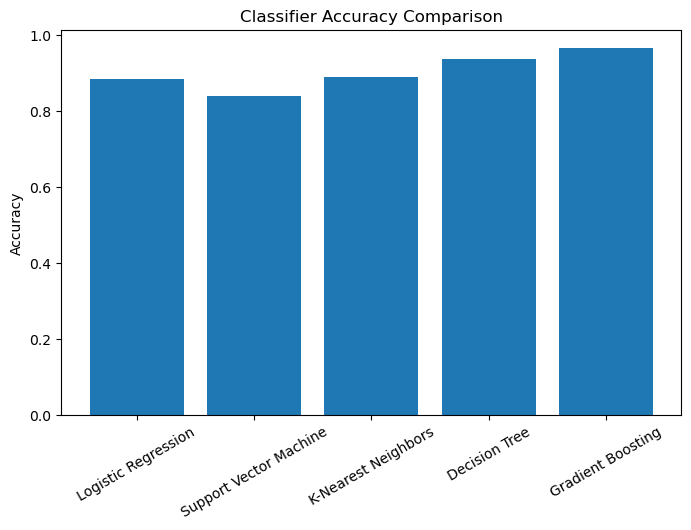

In [43]:
#Compare accuracies in a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

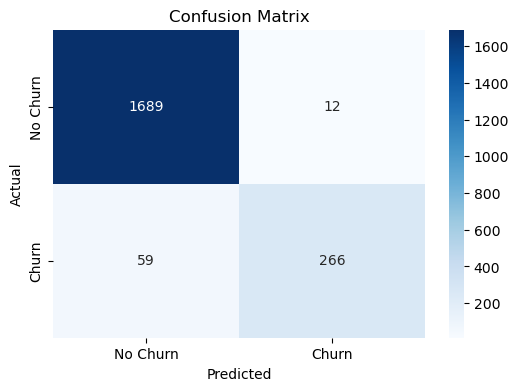

In [45]:
#confusion matrix heatmap

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict again (if not already done)
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


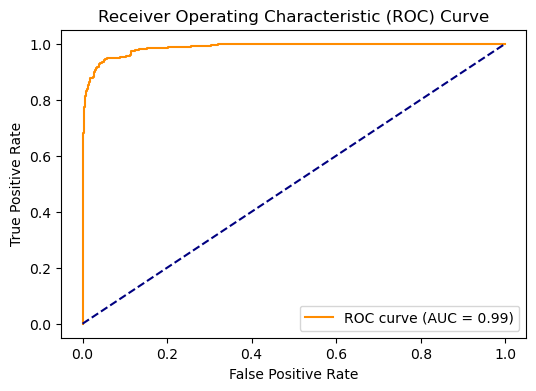

In [47]:
#ROC curve and AUC curve

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [53]:
#testing models

import pandas as pd

#predicting test set

# Predict class labels (0 = stay, 1 = churn)
predictions = model.predict(X_test)

# Predict churn probabilities
probabilities = model.predict_proba(X_test)[:, 1]

# Convert X_test to DataFrame if it's not already one
if not isinstance(X_test, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test)
else:
    X_test_df = X_test.copy()

# Add predictions to your test set
results = X_test_df.copy()
results['Actual'] = y_test
results['Predicted'] = predictions
results['Churn_Probability'] = probabilities

# View a few results
results.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,Actual,Predicted,Churn_Probability
0,65.0,1.0,0.0,5.0,2.0,4.0,0.0,56.0,4.0,2.0,...,2073.0,1153.0,1.035,3250.0,70.0,0.591,0.643,NaN,0,0.023226
1,41.0,0.0,3.0,2.0,2.0,4.0,3.0,30.0,2.0,1.0,...,0.0,11463.0,0.908,14511.0,105.0,0.721,0.000,NaN,0,0.030300
2,31.0,0.0,0.0,0.0,1.0,4.0,0.0,21.0,5.0,2.0,...,0.0,1677.0,1.369,3059.0,50.0,0.613,0.000,NaN,0,0.131463
3,51.0,0.0,1.0,6.0,1.0,1.0,0.0,36.0,2.0,1.0,...,468.0,970.3,0.747,4425.0,81.0,1.077,0.325,0.0,0,0.005602
4,51.0,0.0,3.0,2.0,2.0,4.0,0.0,41.0,6.0,2.0,...,1148.0,371.0,0.767,4927.0,73.0,0.738,0.756,0.0,0,0.010671


In [64]:
#testing model on a new customer

# Example: New customer data in a DataFrame
new_customer = pd.DataFrame({
    'Age': [50],
    'Gender': [1],  # Already label encoded (e.g., M = 1, F = 0)
    'Number_of_Dependents': [2],
    'Education_Level': [3],
    'Marital_Status': [1],
    'Income_Category': [2],
    'Card_Category': [0],
    'Months_on_book': [40],
    'Number_of_Products': [4],
    'Months_Inactive': [2],
    'Contacts_count': [2],
    'Credit_Limit': [8000],
    'Total_Revolving_Balance': [1000],
    'Average_Open_to_Buy': [7000],
    'Total_Amount_Change_Q4_Q1': [1.2],
    'Total_Transaction_Amount': [1200],
    'Total_Transaction_Count': [30],
    'Total_Count_Change_Q4_Q1': [1.1],
    'Average_Utilization_Ratio': [0.125]
})

# Predict churn probability
churn_prob = model.predict_proba(new_customer)[:, 1][0]

# Predict class (0 or 1)
churn_class = model.predict(new_customer)[0]

print(f"Churn Probability: {churn_prob:.2f}")
print("Prediction:", "Churn" if churn_class == 1 else "Stay")

Churn Probability: 0.00
Prediction: Stay


C:\Users\aleji\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\aleji\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [66]:
# Model feature importances (instead of coefficients)

# GradientBoostingClassifier doesn't have coef_ but has feature_importances_
feature_importances = model.feature_importances_  # importance of each feature
print("Feature importances:", feature_importances)

# Note: There's no direct equivalent to intercept for GradientBoostingClassifier
# If you need to understand the model's behavior, consider:
# - feature_importances_ for feature importance
# - predict_proba() for probability predictions
# - plot_partial_dependence() for feature effects

Feature importances: [1.12564220e-02 7.74112617e-04 3.04976315e-04 7.67957499e-05
 6.24953366e-04 1.66933391e-04 0.00000000e+00 1.87091086e-03
 9.47166468e-02 1.57712410e-02 1.75087857e-02 6.47037296e-04
 1.90818915e-01 3.15612098e-03 3.05047365e-02 1.90969112e-01
 3.40499156e-01 9.94038841e-02 9.29260282e-04]
